In [8]:
import pandas as pd
import numpy as np
from helper_db import connect_to_db
cursor = connect_to_db()
cursor.execute("SELECT table_schema,table_name FROM information_schema.tables ORDER BY table_schema,table_name;")



In [18]:
# getting global temperatures lastdecade from the max date of reporting  (2015-09-01)
def global_temperatures_decade():
    cursor.execute(
    "SELECT *,(date_part('year','2015-12-01'::date)-date_part('year',dt::date)) as lastdecade FROM import.globaltemperatures where (date_part('year','2015-12-01'::date)-date_part('year',dt::date))<=10;"
)
    #return dataframe
    return pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])
  


In [19]:
# Global temperatures in the last century -  (2015-09-01) is the maximum year..

def global_temperatures_last_century():
    cursor.execute(
        "SELECT * FROM import.globaltemperatures where (date_part('year','2015-12-01'::date)-date_part('year',dt::date))<=100;"
    )
    #return dataframe
    return pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])


In [20]:
# temperatures by the top 5 countries in the last century: Higest pollutors = United States, China, Russia, India, Japan
def temperatures_of_top5():
    cursor.execute(
    "SELECT * FROM import.globaltemperaturesbycountry where (date_part('year','2015-12-01'::date)-date_part('year',dt::date))<=100 and country in ('United States','China','Russia','India','Japan');"
)
    #return dataframe
    return pd.DataFrame(cursor.fetchall(), columns=[x[0] for x in cursor.description])


In [3]:
# add a column for highest pollutors by season.
# usa: winter = 12,1,2, spring = 3,4,5, summer = 6,7,8, fall = 9,10,11
# Russia: winter = 11,12,1,2,3, spring = 4,5 summer = 6,7,8 autumn = 9,10
# china: winter =12,1,2 sprint = 3,4,5 summer = 06,7,8 autum = 9,10,11
# india: winter = 12,1 spring = 2,3 summer = 4,5,6 monsoon 7,8,9(01-15th), autum =9,(15th -) 10,11
# japan: winter = 12,1,2 spring = 3,4,5 summer = 6,7,8 autumn = 9,10,11


def add_season_column():
    cursor.execute(
        "ALTER TABLE import.globaltemperaturesbycountry ADD COLUMN season varchar(10);"
    )
    cursor.execute(
        "UPDATE import.globaltemperaturesbycountry SET season = 'winter' WHERE (date_part('month',dt::date) in (12,1,2) and country = 'United States') or (date_part('month',dt::date) in (11,12,1,2,3) and country = 'Russia') or (date_part('month',dt::date) in (12,1,2) and country = 'China') or (date_part('month',dt::date) in (12,1) and country = 'India') or (date_part('month',dt::date) in (12,1,2) and country = 'Japan');"
    )
    cursor.execute(
        "UPDATE import.globaltemperaturesbycountry SET season = 'spring' WHERE (date_part('month',dt::date) in (3,4,5) and country = 'United States') or (date_part('month',dt::date) in (4,5) and country = 'Russia') or (date_part('month',dt::date) in (3,4,5) and country = 'China') or (date_part('month',dt::date) in (2,3) and country = 'India') or (date_part('month',dt::date) in (3,4,5) and country = 'Japan');"
    )
    cursor.execute(
        "UPDATE import.globaltemperaturesbycountry SET season = 'summer' WHERE (date_part('month',dt::date) in (6,7,8) and country = 'United States') or (date_part('month',dt::date) in (6,7,8) and country = 'Russia') or (date_part('month',dt::date) in (6,7,8) and country = 'China') or (date_part('month',dt::date) in (4,5,6) and country = 'India') or (date_part('month',dt::date) in (6,7,8) and country = 'Japan');"
    )
    cursor.execute(
        "UPDATE import.globaltemperaturesbycountry SET season = 'autumn' WHERE (date_part('month',dt::date) in (9,10) and country = 'Russia') or (date_part('month',dt::date) in (9,10,11) and country = 'China') or (date_part('month',dt::date) in (9,10,11) and country = 'India') or (date_part('month',dt::date) in (9,10,11) and country = 'Japan');"
    )
    cursor.execute(
        "UPDATE import.globaltemperaturesbycountry SET season = 'monsoon' WHERE (date_part('month',dt::date) in (7,8) and country = 'India');"
    )
    cursor.execute(
        "UPDATE import.globaltemperaturesbycountry SET season = 'Fall' where (date_part('month',dt::date) in (9,10,11) and country = 'United States');"
    )
    pass


pass



<AxesSubplot: title={'center': 'Global Land Average Temperature in the last decade'}, xlabel='dt'>

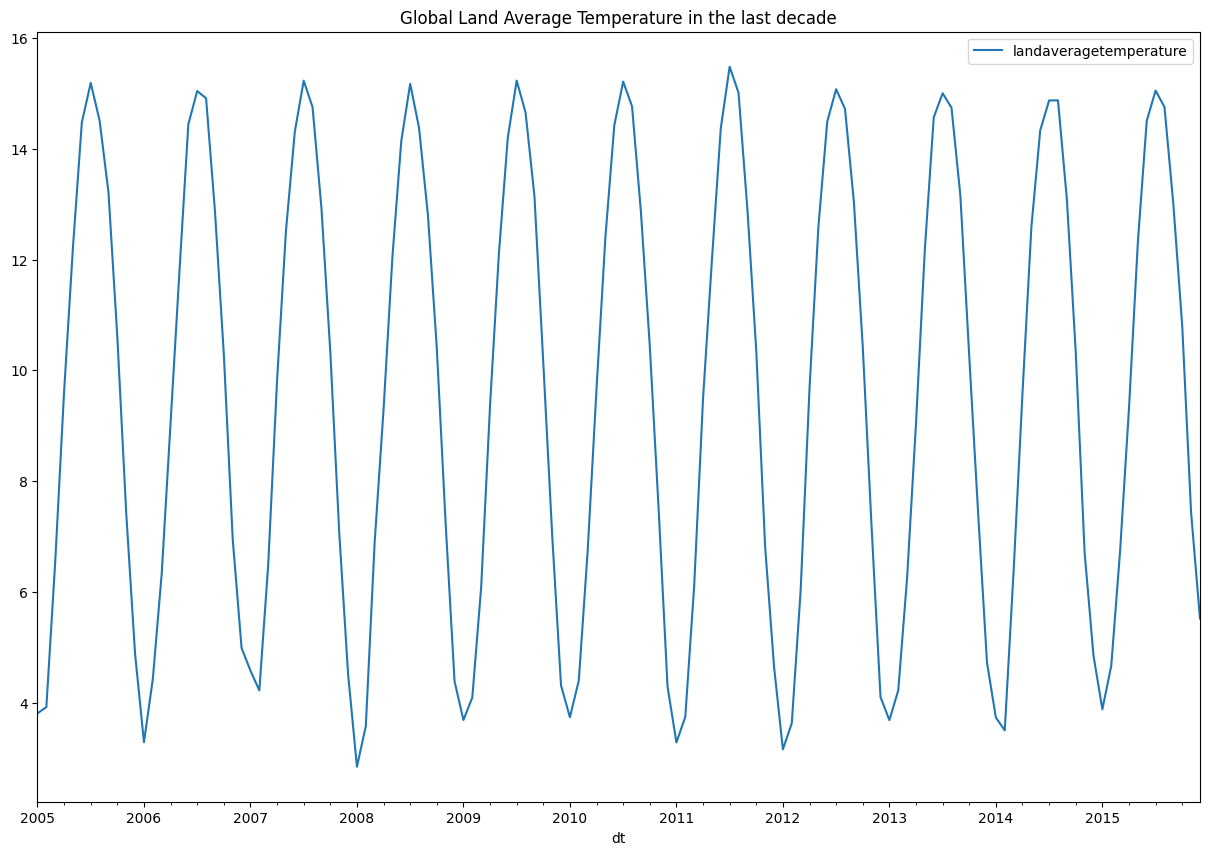

In [8]:

df = global_temperatures_decade()
# convert landaveragetemperature to float
df['landaveragetemperature'] = df['landaveragetemperature'].astype(float)
df['dt'] = pd.to_datetime(df['dt'])
# group by year and take the mean
df.plot(x='dt', y='landaveragetemperature', kind='line', figsize=(15, 10), title='Global Land Average Temperature in the last decade')

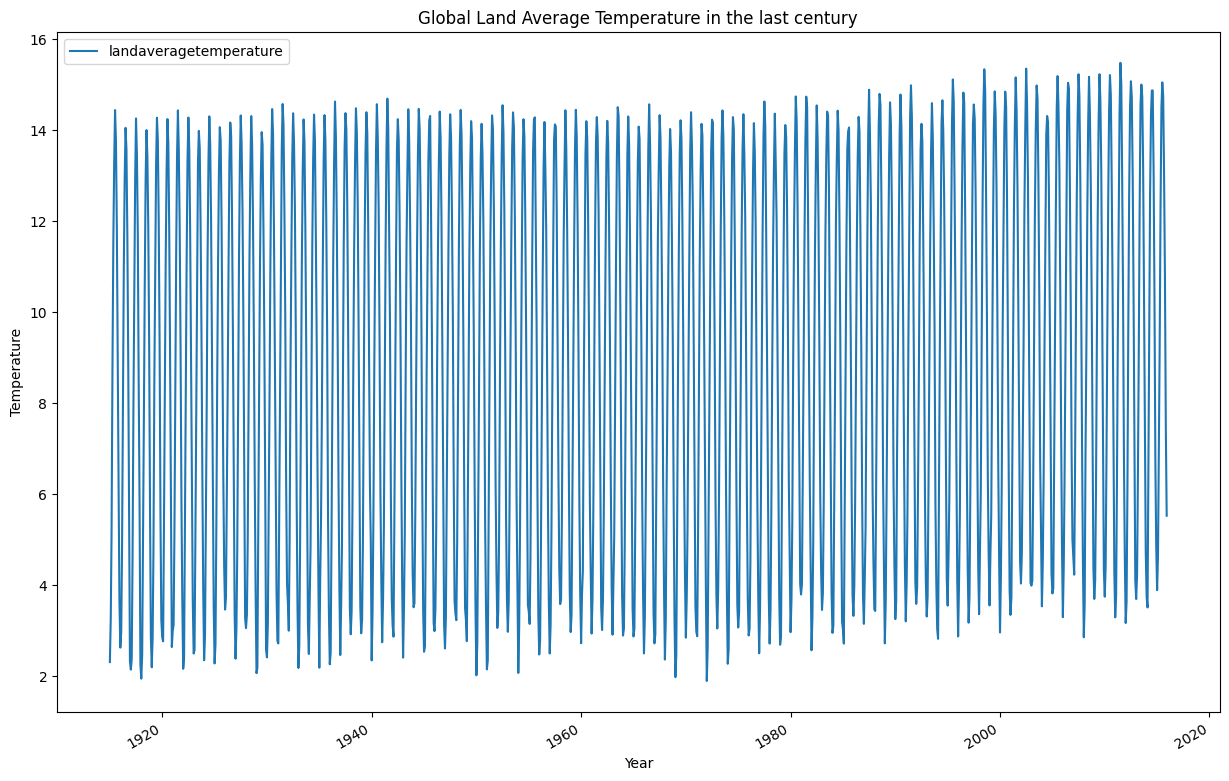

In [9]:
import matplotlib.pyplot as plt
df = global_temperatures_last_century()
# convert landaveragetemperature to float
df['landaveragetemperature'] = df['landaveragetemperature'].astype(float)
df['dt'] = pd.to_datetime(df['dt'])

# group by year and take the mean
df.plot(x='dt', y='landaveragetemperature', kind='line', figsize=(15, 10), title='Global Land Average Temperature in the last century')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()




In [ ]:
# plot temperatures by the top 5 countries in the last century
df = temperatures_of_top5()

# filter string values in the dataframe
df = df[df.landaveragetemperature != 'NaN']

